# Mobility in Lombardy


##### In this step we reproduce the section of the Sectoral emission during the lockdown.                                                                                               The tightening of containement measures have substantially reduced mobility and economic activity.                                                                             To analise the mobility we consider the mobile phone data reveals only from Google souce, since the Apple source is not available any more. In the following code we download the data and select the region Lombardy, we select the time period concerned. We create a tine series plot and we identify in the graph the three main moments of the lockdown in Lombardy ( Lockdown 11 municipalities, Schools close and Lockdown Lombardy)

In [47]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import requests
import openpyxl
from datetime import datetime

%run setup.ipynb

In [48]:
## download data
url='https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv?cachebust=9cfdda8c20841ad1'

# defining function to download data
def download_mobility_data(url):
    if os.path.exists(f"{RAW_MOBILITY}/Global_Mobility_Report.csv"):
        print("mobility data is already present")
    else:
        print("Downloading mobility data")
        req = requests.get(url)
        filebytes = io.BytesIO(req.content)
        myzipfile = ZipFile(filebytes)
        myzipfile.extractall(RAW_MOBILITY)
        print("Download complete!")

download_mobility_data(url)

mobility data is already present


In [49]:
mobility_google = pd.read_csv(f"{RAW_MOBILITY}/Global_Mobility_Report.csv", low_memory=False) 
#print(mobility_google)

mobility_google = mobility_google.loc[mobility_google['sub_region_1'] == 'Lombardy']
mobility_google=mobility_google[["date", "transit_stations_percent_change_from_baseline"]].set_index('date')
mobility_google.rename(columns={'transit_stations_percent_change_from_baseline': 'transit'}, inplace=True)


mobility_google = mobility_google[~mobility_google.index.duplicated(keep='first')]
mobility_google.index = pd.to_datetime(mobility_google.index)
mobility_google= mobility_google[mobility_google.index < pd.to_datetime("2020-05-03")]

# Rescale
mobility_google = (mobility_google - mobility_google.loc[mobility_google.index == '2020-02-23'].values) + 100 



mobility_google

transit
date               
2020-02-15    121.0
2020-02-16    115.0
2020-02-17    114.0
2020-02-18    117.0
2020-02-19    117.0
...             ...
2020-04-28     33.0
2020-04-29     34.0
2020-04-30     34.0
2020-05-01     24.0
2020-05-02     36.0

[78 rows x 1 columns]

In [50]:
#  set up locators and formatters date on the graph 
weeks = mdates.WeekdayLocator()
weeks_fmt = mdates.DateFormatter('%W')
months = mdates.MonthLocator()
months_fmt = mdates.DateFormatter('%b')
days = mdates.DayLocator()
days_fmt = mdates.DateFormatter('%d %b')

## Format the x-axis with day and month only
def format_ticks(ax):
    ax.xaxis.set_minor_locator(days)   ##  Set the lowest locator for days
    ax.xaxis.set_major_locator(weeks)  ## Set the largest locator for weeks
    ax.xaxis.set_major_formatter(days_fmt)   ## main formatter
    
def vertical_lines(ax):
    ax.axvline(codogno, color='black')
    ax.axvline(schools_closed, color='black')
    ax.axvline(lockdown, color='black')
    

# Relevant moments
codogno = pd.to_datetime('2020-02-21')
schools_closed = pd.to_datetime('2020-02-24')
lockdown = pd.to_datetime('2020-03-08')


def place_text(ax, offset=-18, fontsize=12):
    ylims = ax.get_ylim()
    ax.set_ylim(ylims)
    max = ylims[1]
    fontsize = 12
    ax.text(codogno + pd.DateOffset(offset), max * 0.85, "                         Lockdown\n               11 municipalities", fontsize=fontsize)
    ax.text(schools_closed, max * 0.85, " Schools\n close", fontsize=fontsize)
    ax.text(lockdown, max * 0.85, " Lockdown\n Lombardy", fontsize=fontsize)


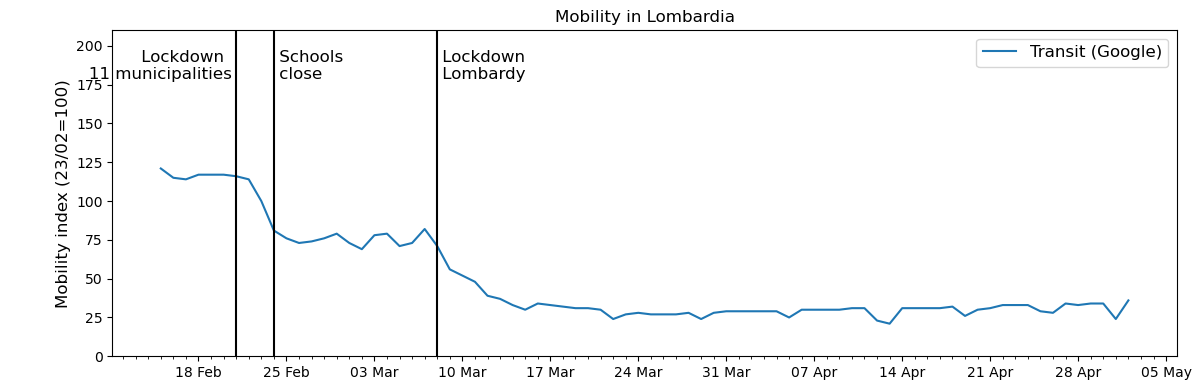

In [51]:
# Plot
fig, ax = plt.subplots(figsize=(12, 4))
fontsize = 12
ax.plot(mobility_google.index, mobility_google['transit'], label='Transit (Google)')

ax.set_ylim((0, 210))
format_ticks(ax)
vertical_lines(ax)
place_text(ax, fontsize=fontsize)

# Axis label
ax.set_ylabel(f'Mobility index (23/02=100)', fontsize=fontsize)

# Legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, fontsize=fontsize)
# Axis title
ax.set_title(f'Mobility in Lombardia', fontsize=fontsize)

plt.tight_layout()


## TERNA DATA

##### Under lockdown, all non essential industrial production stopped. To see how energy has changed we compare the Terna data of 2019 and 2020. These data represent the total load of energy demand in Northen Italy in MW. As result, the total energy demand in Northen Italy steadily decreased since 9 March as we can see in the graph.

In [52]:
##the data were download from this link https://www.terna.it/it/sistema-elettrico/transparency-report/download-center
## 2020

df20 = pd.read_excel(f"{RAW_MOBILITY}/Terna_TotalLoad2020.xlsx")
df20.columns = ['dt', 'tot', 'forecast', 'zone']
df20 = df20.drop([0, 1])
df20

dt        tot   forecast   zone
2     2020-03-31 23:45:00  13816.008  13733.732  North
3     2020-03-31 23:30:00  13983.224  14173.511  North
4     2020-03-31 23:15:00  14484.934  14735.335  North
5     2020-03-31 23:00:00  14774.344  15095.571  North
6     2020-03-31 22:45:00  15331.593  15575.645  North
...                   ...        ...        ...    ...
8729  2020-01-01 01:00:00  10995.735  11120.751  North
8730  2020-01-01 00:45:00  11041.934  11265.805  North
8731  2020-01-01 00:30:00  11249.503  11490.972  North
8732  2020-01-01 00:15:00  11523.598  11741.578  North
8733  2020-01-01 00:00:00  11873.051  11972.237  North

[8732 rows x 4 columns]

In [53]:
df20['dt'] = df20['dt'].apply(lambda x: datetime(x.year, x.month, x.day, x.hour))
df20

dt        tot   forecast   zone
2    2020-03-31 23:00:00  13816.008  13733.732  North
3    2020-03-31 23:00:00  13983.224  14173.511  North
4    2020-03-31 23:00:00  14484.934  14735.335  North
5    2020-03-31 23:00:00  14774.344  15095.571  North
6    2020-03-31 22:00:00  15331.593  15575.645  North
...                  ...        ...        ...    ...
8729 2020-01-01 01:00:00  10995.735  11120.751  North
8730 2020-01-01 00:00:00  11041.934  11265.805  North
8731 2020-01-01 00:00:00  11249.503  11490.972  North
8732 2020-01-01 00:00:00  11523.598  11741.578  North
8733 2020-01-01 00:00:00  11873.051  11972.237  North

[8732 rows x 4 columns]

In [54]:
df20['tot'] = df20['tot'].astype(float)
df20 = df20.groupby(['dt'])['tot'].mean().reset_index()
df20.columns = ['dt20', 'tot20']
df20

dt20        tot20
0    2020-01-01 00:00:00  11422.02150
1    2020-01-01 01:00:00  10851.90225
2    2020-01-01 02:00:00  10469.72375
3    2020-01-01 03:00:00   9801.27350
4    2020-01-01 04:00:00   9578.00625
...                  ...          ...
2178 2020-03-31 19:00:00  18360.46225
2179 2020-03-31 20:00:00  18868.35525
2180 2020-03-31 21:00:00  17109.68400
2181 2020-03-31 22:00:00  15833.78200
2182 2020-03-31 23:00:00  14264.62750

[2183 rows x 2 columns]

In [55]:
## 2019

df19 = pd.read_excel(f"{RAW_MOBILITY}/Terna_TotalLoad2019.xlsx")
df19.columns = ['dt', 'tot', 'forecast', 'zone']
df19 = df19.drop([0, 1])

df19['dt'] = df19['dt'].apply(lambda x: datetime(x.year, x.month, x.day, x.hour))
df19['tot'] = df19['tot'].astype(float)

df19 = df19.groupby(['dt'])['tot'].mean().reset_index()
df19.columns = ['dt19', 'tot19']
df19

dt19        tot19
0    2019-01-01 00:00:00  11752.87825
1    2019-01-01 01:00:00  11293.83775
2    2019-01-01 02:00:00  10611.24875
3    2019-01-01 03:00:00   9898.26125
4    2019-01-01 04:00:00   9590.77275
...                  ...          ...
2154 2019-03-31 19:00:00  17228.94725
2155 2019-03-31 20:00:00  18411.05475
2156 2019-03-31 21:00:00  17352.50125
2157 2019-03-31 22:00:00  16070.48675
2158 2019-03-31 23:00:00  14119.17750

[2159 rows x 2 columns]

#### We shifted the time series of 2019 to match the day of the week, since in 2019 February has 28 days and in 2020 has 29 days.

In [56]:
# Shift 2019 by 1 day to match day-of-week
df19['tot19'] = df19['tot19'].shift(-24)

# Adjust time series to match day of the week
dates_range = pd.date_range(df20['dt20'].min(), df20['dt20'].max(), freq='h')

df20.dropna(subset=['dt20'], inplace=True)
df19.dropna(subset=['dt19'], inplace=True)
df20['dt'] = df20['dt20'].apply(lambda x: datetime(year=int(x.year), month=int(x.month), day=int(x.day), hour=int(x.hour)))
df19['dt'] = df19['dt19'].apply(lambda x: datetime(year=2020, month=int(x.month), day=int(x.day), hour=int(x.hour)))


df20 = df20.set_index('dt').reindex(dates_range).reset_index().rename(columns={'index': 'dt'})
df19 = df19.set_index('dt').reindex(dates_range).reset_index().rename(columns={'index': 'dt'})

# Merge
df = pd.merge(df20, df19, on='dt')
df

dt                dt20        tot20                dt19        tot19
0    2020-01-01 00:00:00 2020-01-01 00:00:00  11422.02150 2019-01-01 00:00:00  10641.02225
1    2020-01-01 01:00:00 2020-01-01 01:00:00  10851.90225 2019-01-01 01:00:00   9791.80125
2    2020-01-01 02:00:00 2020-01-01 02:00:00  10469.72375 2019-01-01 02:00:00   9452.60450
3    2020-01-01 03:00:00 2020-01-01 03:00:00   9801.27350 2019-01-01 03:00:00   9412.43675
4    2020-01-01 04:00:00 2020-01-01 04:00:00   9578.00625 2019-01-01 04:00:00   9753.23225
...                  ...                 ...          ...                 ...          ...
2179 2020-03-31 19:00:00 2020-03-31 19:00:00  18360.46225 2019-03-31 19:00:00          NaN
2180 2020-03-31 20:00:00 2020-03-31 20:00:00  18868.35525 2019-03-31 20:00:00          NaN
2181 2020-03-31 21:00:00 2020-03-31 21:00:00  17109.68400 2019-03-31 21:00:00          NaN
2182 2020-03-31 22:00:00 2020-03-31 22:00:00  15833.78200 2019-03-31 22:00:00          NaN
2183 2020-03-31 23:00:00 2020-03-31 23:00:00  14264.62750 2019-03-31 23:00:00          NaN

[2184 rows x 5 columns]

In [57]:
# Shift 2019 by 1 day to match day-of-week (b/c of Feb 29)
df.loc[df['dt'] > pd.to_datetime('20200229'), 'tot19'] = df.loc[df['dt'] > pd.to_datetime('20200229'), 'tot19'].shift(-24)

df['date'] = df['dt'].apply(lambda x: datetime(year=x.year, month=x.month, day=x.day))
pdf = df.loc[(df['date'] >= pd.to_datetime('20200201')) & (df['date'] < pd.to_datetime('20200331'))]
pdf

dt                dt20        tot20                dt19        tot19       date
744  2020-02-01 00:00:00 2020-02-01 00:00:00  17327.49125 2019-02-01 00:00:00  17140.81300 2020-02-01
745  2020-02-01 01:00:00 2020-02-01 01:00:00  16374.84175 2019-02-01 01:00:00  16021.04475 2020-02-01
746  2020-02-01 02:00:00 2020-02-01 02:00:00  15852.80225 2019-02-01 02:00:00  15446.69025 2020-02-01
747  2020-02-01 03:00:00 2020-02-01 03:00:00  15550.72750 2019-02-01 03:00:00  15302.22575 2020-02-01
748  2020-02-01 04:00:00 2020-02-01 04:00:00  15801.70625 2019-02-01 04:00:00  15471.14250 2020-02-01
...                  ...                 ...          ...                 ...          ...        ...
2155 2020-03-30 19:00:00 2020-03-30 19:00:00  18162.58750 2019-03-30 19:00:00          NaN 2020-03-30
2156 2020-03-30 20:00:00 2020-03-30 20:00:00  18346.06800 2019-03-30 20:00:00          NaN 2020-03-30
2157 2020-03-30 21:00:00 2020-03-30 21:00:00  17189.33075 2019-03-30 21:00:00          NaN 2020-03-30
2158 2020-03-30 22:00:00 2020-03-30 22:00:00  15331.54475 2019-03-30 22:00:00          NaN 2020-03-30
2159 2020-03-30 23:00:00 2020-03-30 23:00:00  13495.81475 2019-03-30 23:00:00          NaN 2020-03-30

[1416 rows x 6 columns]

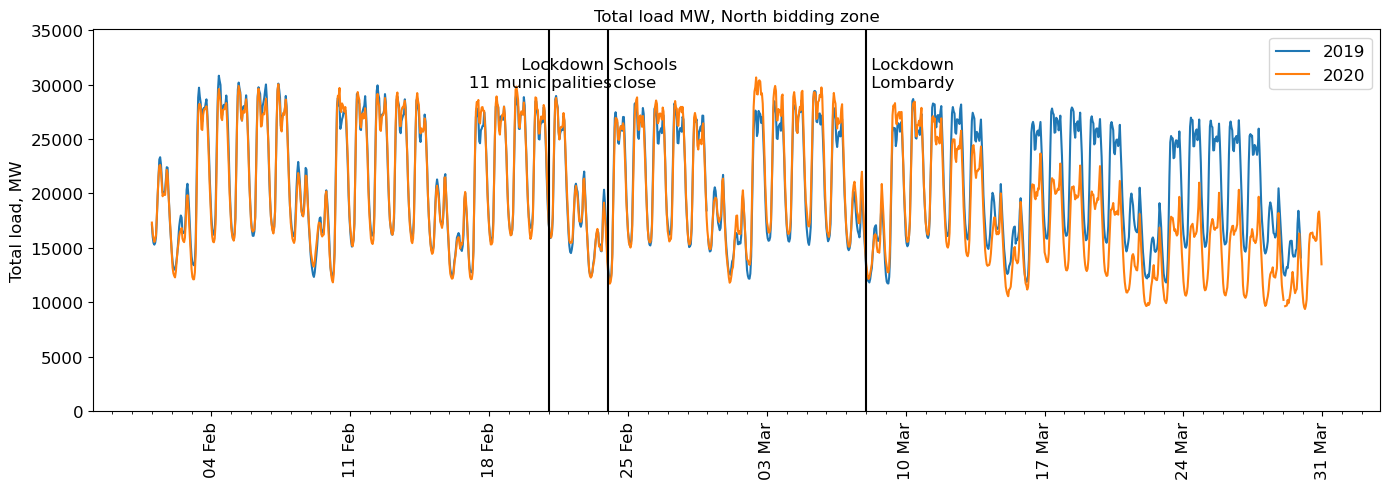

In [58]:
## plot 
fig, ax = plt.subplots(figsize=(14, 5))
fontsize = 12

ax.plot(pdf['dt'], pdf['tot19'], label='2019')
ax.plot(pdf['dt'], pdf['tot20'], label='2020')
ax.set_ylim((0, ax.get_ylim()[1] * 1.1))
format_ticks(ax)
vertical_lines(ax)

place_text(ax, fontsize=fontsize, offset=-8)

# Labels
ax.set_ylabel('Total load, MW', fontsize=fontsize)
plt.xticks(rotation=90, ha='center', fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.title('Total load MW, North bidding zone', fontsize=fontsize)
plt.tight_layout()
plt.show()
